In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz as gv
from graphviz import Source
from sklearn import tree
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24
#Source( tree.export_graphviz(dtreg, out_file=None, feature_names=X.columns))

In [77]:
#Import test data file, add columns for log-transformed data
test_data = pd.read_csv(os.path.join('../data', 'cleanLoanDataValidationAllIncome.csv'))
test_data['LogTotalIncome']=np.log(test_data['TotalIncome'])
test_data["LogLoanAmount"]= np.log(test_data["LoanAmount"])
pd.set_option('display.max_columns', None)
test_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LogTotalIncome,LogLoanAmount
0,0,1,0,1,0,5720.0,0.0,110000.0,360.0,1,2,5720.0,8.651724,11.608236
1,0,1,1,1,0,3076.0,1500.0,126000.0,360.0,1,2,4576.0,8.428581,11.744037
2,0,1,2,1,0,5000.0,1800.0,208000.0,360.0,1,2,6800.0,8.824678,12.245293
3,0,1,2,1,0,2340.0,2546.0,100000.0,360.0,0,2,4886.0,8.494129,11.512925
4,0,0,0,0,0,3276.0,0.0,78000.0,360.0,1,2,3276.0,8.094378,11.264464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,0,1,3,0,1,4009.0,1777.0,113000.0,360.0,1,2,5786.0,8.663196,11.635143
341,0,1,0,1,0,4158.0,709.0,115000.0,360.0,1,2,4867.0,8.490233,11.652687
342,0,0,0,1,0,3250.0,1993.0,126000.0,360.0,0,1,5243.0,8.564649,11.744037
343,0,1,0,1,0,5000.0,2393.0,158000.0,360.0,1,0,7393.0,8.908289,11.970350


In [78]:
#Import training data file, add columns for log-transformed data
train_data = pd.read_csv(os.path.join('../data', 'cleanLoanDataTrainAllIncome.csv'))
train_data['LogTotalIncome']=np.log(train_data['TotalIncome'])
train_data["LogLoanAmount"]= np.log(train_data["LoanAmount"])
pd.set_option('display.max_columns', None)
train_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LogTotalIncome,LogLoanAmount
0,0,1,1,1,0,4583.0,1508.0,128000.0,360.0,1,0,0,6091.0,8.714568,11.759786
1,0,1,0,1,1,3000.0,0.0,66000.0,360.0,1,2,1,3000.0,8.006368,11.097410
2,0,1,0,0,0,2583.0,2358.0,120000.0,360.0,1,2,1,4941.0,8.505323,11.695247
3,0,0,0,1,0,6000.0,0.0,141000.0,360.0,1,2,1,6000.0,8.699515,11.856515
4,0,1,2,1,1,5417.0,4196.0,267000.0,360.0,1,2,1,9613.0,9.170872,12.495004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,1,0,0,1,0,2900.0,0.0,71000.0,360.0,1,0,1,2900.0,7.972466,11.170435
559,0,1,3,1,0,4106.0,0.0,40000.0,180.0,1,0,1,4106.0,8.320205,10.596635
560,0,1,1,1,0,8072.0,240.0,253000.0,360.0,1,2,1,8312.0,9.025456,12.441145
561,0,1,2,1,0,7583.0,0.0,187000.0,360.0,1,2,1,7583.0,8.933664,12.138864


## 1a. random_state = 57, n_estimators = 200, Combined income

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", "ApplicantIncome", "CoapplicantIncome", "LogTotalIncome", "LogLoanAmount"], axis=1)
feature_names = data.columns

In [81]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [82]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7606635071090048
Test score:  0.723404255319149


In [83]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.2744718876344932, 'TotalIncome'),
 (0.24626547594783438, 'LoanAmount'),
 (0.19184731321885337, 'Credit_History'),
 (0.06145801347186792, 'Property_Area'),
 (0.05885740597326116, 'Dependents'),
 (0.055086146479817105, 'Loan_Amount_Term'),
 (0.029592812219124024, 'Married'),
 (0.02895578373690855, 'Education'),
 (0.027351638886571855, 'Gender'),
 (0.026113522431268348, 'Self_Employed')]

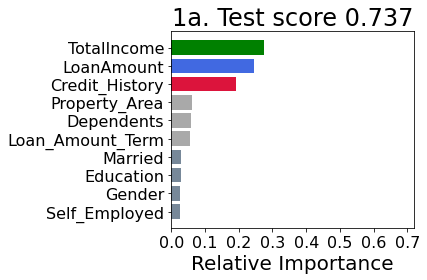

In [84]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 10
colors[9] = 'green'
colors[8] = 'royalblue'
colors[7] = 'crimson'
colors[6] = 'darkgray'
colors[5] = 'darkgray'
colors[4] = 'darkgray'
#colors[6] = 'goldenrod'
#colors[5] = 'darkorchid'#dep
#colors[4] = 'darkturquoise'#mar
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('1a. Test score 0.737', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_1a.png')
plt.show()

## 1b: random_state = 57, n_estimators = 200, Applicant and co-applicant income separate

In [85]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", "TotalIncome", "LogTotalIncome", "LogLoanAmount"], axis=1)
feature_names = data.columns

In [86]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [87]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7251184834123223
Test score:  0.6879432624113475


In [88]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.20903687494801756, 'ApplicantIncome'),
 (0.20346520066170123, 'LoanAmount'),
 (0.19071679277770306, 'Credit_History'),
 (0.1282404271392685, 'CoapplicantIncome'),
 (0.057333720794614976, 'Loan_Amount_Term'),
 (0.05371381796049974, 'Dependents'),
 (0.051536103255944744, 'Property_Area'),
 (0.029095494061173358, 'Education'),
 (0.027863509823514335, 'Married'),
 (0.026406501033671724, 'Gender'),
 (0.02259155754389086, 'Self_Employed')]

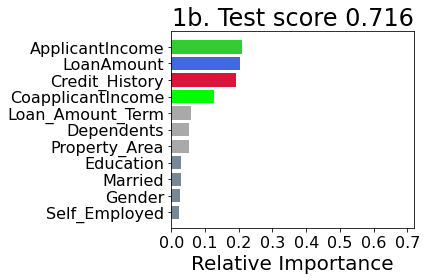

In [89]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 11
colors[10] = 'limegreen'
colors[9] = 'royalblue'
colors[8] = 'crimson'
colors[7] = 'lime'
colors[6] = 'darkgray'
colors[5] = 'darkgray'
colors[4] = 'darkgray'
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('1b. Test score 0.716', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_1b.png')
plt.show()

## 1c: random_state = 57, n_estimators = 200, log(TotalIncome)

In [90]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", "TotalIncome", "ApplicantIncome", "CoapplicantIncome", "LogLoanAmount"], axis=1)
feature_names = data.columns

In [91]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [92]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7559241706161137
Test score:  0.7375886524822695


In [93]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.2687340666994869, 'LogTotalIncome'),
 (0.24667719388177492, 'LoanAmount'),
 (0.19143540544944268, 'Credit_History'),
 (0.06406273755370528, 'Property_Area'),
 (0.05762162528842265, 'Loan_Amount_Term'),
 (0.056128544853728, 'Dependents'),
 (0.030523911089137056, 'Married'),
 (0.029360264702657863, 'Education'),
 (0.027840367485945334, 'Self_Employed'),
 (0.02761588299569923, 'Gender')]

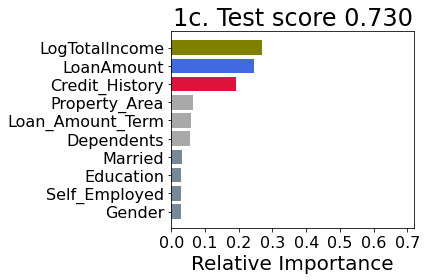

In [94]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 10
colors[9] = 'olive'
colors[8] = 'royalblue'
colors[7] = 'crimson'
colors[6] = 'darkgray'
colors[5] = 'darkgray'
colors[4] = 'darkgray'
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('1c. Test score 0.730', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_1c.png')
plt.show()

## 1d: random_state = 57, n_estimators = 200, log(TotalIncome), used log(LoanAmount)

In [95]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", "TotalIncome", "ApplicantIncome", "CoapplicantIncome", "LoanAmount"], axis=1)
feature_names = data.columns

In [96]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [97]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7559241706161137
Test score:  0.723404255319149


In [98]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.2719120270940672, 'LogTotalIncome'),
 (0.2497565391705154, 'LogLoanAmount'),
 (0.19016909595205853, 'Credit_History'),
 (0.06194634649348755, 'Property_Area'),
 (0.058444355082019846, 'Loan_Amount_Term'),
 (0.05718026167555505, 'Dependents'),
 (0.03030530269529224, 'Education'),
 (0.027784965302740616, 'Married'),
 (0.027428530882410585, 'Gender'),
 (0.025072575651853078, 'Self_Employed')]

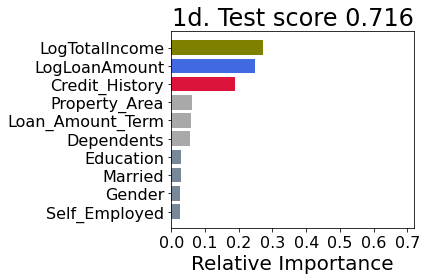

In [99]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 10
colors[9] = 'olive'
colors[8] = 'royalblue'
colors[7] = 'crimson'
colors[6] = 'darkgray'
colors[5] = 'darkgray'
colors[4] = 'darkgray'
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('1d. Test score 0.716', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_1d.png')
plt.show()

## 2a: take out Loan_Amount_Term, random_state = 57, n_estimators = 200, Combined income

In [100]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'Loan_Amount_Term', "ApplicantIncome", "CoapplicantIncome", "LogTotalIncome", "LogLoanAmount"], axis=1)
feature_names = data.columns

In [101]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [102]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7535545023696683
Test score:  0.7375886524822695


In [103]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.28743076866395395, 'TotalIncome'),
 (0.2682060055155744, 'LoanAmount'),
 (0.1968775323294254, 'Credit_History'),
 (0.06453326524291506, 'Property_Area'),
 (0.06279272617016367, 'Dependents'),
 (0.031993712337835545, 'Education'),
 (0.02986065791278056, 'Married'),
 (0.0298086657606966, 'Self_Employed'),
 (0.028496666066654734, 'Gender')]

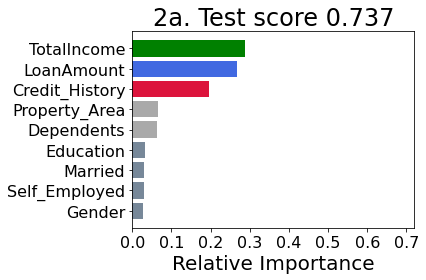

In [104]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 9
colors[8] = 'green'
colors[7] = 'royalblue'
colors[6] = 'crimson'
colors[5] = 'darkgray'
colors[4] = 'darkgray'
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('2a. Test score 0.737', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_2a.png')
plt.show()

## 2b: take out Loan_Amount_Term, random_state = 57, n_estimators = 200, Applicant and co-applicant income separate

In [105]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'Loan_Amount_Term', "TotalIncome", "LogTotalIncome", "LogLoanAmount"], axis=1)
feature_names = data.columns

In [106]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [107]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7440758293838863
Test score:  0.723404255319149


In [108]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.22746432943438033, 'ApplicantIncome'),
 (0.2200361836199114, 'LoanAmount'),
 (0.19057453169319574, 'Credit_History'),
 (0.13513860077653747, 'CoapplicantIncome'),
 (0.05862775996161106, 'Dependents'),
 (0.057909983665623825, 'Property_Area'),
 (0.03170877732399022, 'Education'),
 (0.029588334047292403, 'Married'),
 (0.025985352521003018, 'Gender'),
 (0.02296614695645443, 'Self_Employed')]

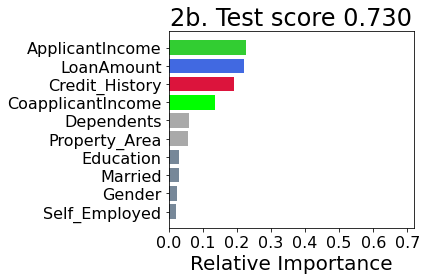

In [109]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 10
colors[9] = 'limegreen'
colors[8] = 'royalblue'
colors[7] = 'crimson'
colors[6] = 'lime'
colors[5] = 'darkgray'
colors[4] = 'darkgray'
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('2b. Test score 0.730', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_2b.png')
plt.show()

## 2c: take out Loan_Amount_Term, random_state = 57, n_estimators = 200, log(TotalIncome)

In [110]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'Loan_Amount_Term', "TotalIncome", "ApplicantIncome", "CoapplicantIncome", "LogLoanAmount"], axis=1)
feature_names = data.columns

In [111]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [112]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7606635071090048
Test score:  0.7304964539007093


In [113]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.29720953181381476, 'LogTotalIncome'),
 (0.2717007916380673, 'LoanAmount'),
 (0.19085486125617954, 'Credit_History'),
 (0.06027726221608093, 'Property_Area'),
 (0.06003248973638608, 'Dependents'),
 (0.032766876123995835, 'Education'),
 (0.030302700332082634, 'Married'),
 (0.028570985897151735, 'Gender'),
 (0.028284500986241246, 'Self_Employed')]

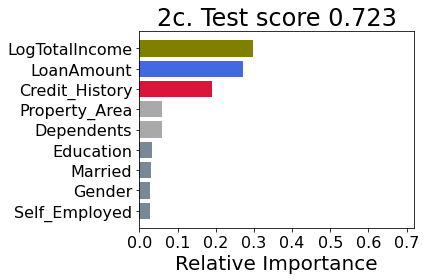

In [114]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 9
colors[8] = 'olive'
colors[7] = 'royalblue'
colors[6] = 'crimson'
colors[5] = 'darkgray'
colors[4] = 'darkgray'

plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('2c. Test score 0.723', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_2c.png')
plt.show()

In [115]:
## 2d: take out Loan_Amount_Term, random_state = 57, n_estimators = 200, log(TotalIncome), used log(LoanAmount)

In [116]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'Loan_Amount_Term', "TotalIncome", "ApplicantIncome", "CoapplicantIncome", "LoanAmount"], axis=1)
feature_names = data.columns

In [117]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [118]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  1.0
Training score with oob sampling:  0.7464454976303317
Test score:  0.7375886524822695


In [119]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.29902621560851705, 'LogTotalIncome'),
 (0.26685426675203344, 'LogLoanAmount'),
 (0.19030284875887998, 'Credit_History'),
 (0.062053858866756344, 'Property_Area'),
 (0.06025296214577943, 'Dependents'),
 (0.03131848337379089, 'Education'),
 (0.030928858855827326, 'Married'),
 (0.03039098695753674, 'Self_Employed'),
 (0.028871518680878887, 'Gender')]

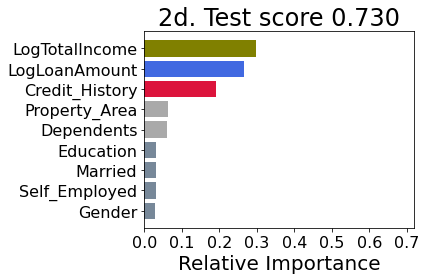

In [120]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 9
colors[8] = 'olive'
colors[7] = 'royalblue'
colors[6] = 'crimson'
colors[5] = 'darkgray'
colors[4] = 'darkgray'

plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('2d. Test score 0.730', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_2d.png')
plt.show()

## 3a: take out Loan_Amount_Term  and LoanAmount columns, random_state = 57, n_estimators = 200, Combined income

In [121]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", 'LoanAmount', 'Loan_Amount_Term',"ApplicantIncome", "CoapplicantIncome", "LogTotalIncome", "LogLoanAmount"], axis=1)
feature_names = data.columns

In [122]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [123]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  0.995260663507109
Training score with oob sampling:  0.7085308056872038
Test score:  0.6879432624113475


In [124]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.5048347708636048, 'TotalIncome'),
 (0.19751263917817324, 'Credit_History'),
 (0.08564592089307857, 'Dependents'),
 (0.07717943348772219, 'Property_Area'),
 (0.03756724746172426, 'Education'),
 (0.0348135625744296, 'Married'),
 (0.03212066307516502, 'Self_Employed'),
 (0.030325762466102316, 'Gender')]

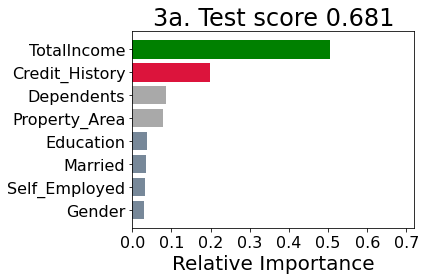

In [125]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 8
colors[7] = 'green'
colors[6] = 'crimson'
colors[5] = 'darkgray'
colors[4] = 'darkgray'
plt.title('3a. Test score 0.681', fontsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_3a.png')
plt.show()



## 3b: take out Loan_Amount_Term  and LoanAmount columns, random_state = 57, n_estimators = 200, Applicant and co-applicant income separate

In [126]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", 'LoanAmount', 'Loan_Amount_Term',"TotalIncome", "LogTotalIncome", "LogLoanAmount"], axis=1)
feature_names = data.columns

In [127]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [128]:
 # Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  0.995260663507109
Training score with oob sampling:  0.7227488151658767
Test score:  0.7021276595744681


In [129]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.33737854005818974, 'ApplicantIncome'),
 (0.19949194947183144, 'Credit_History'),
 (0.18865346764093277, 'CoapplicantIncome'),
 (0.07365256780804537, 'Dependents'),
 (0.0675499847521957, 'Property_Area'),
 (0.03618471090403217, 'Education'),
 (0.03559213769027264, 'Married'),
 (0.03156100700329185, 'Gender'),
 (0.029935634671208397, 'Self_Employed')]

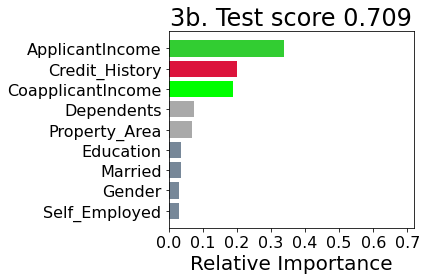

In [130]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 9
colors[8] = 'limegreen'
colors[7] = 'crimson'
colors[6] = 'lime'
colors[5] = 'darkgray'
colors[4] = 'darkgray'
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('3b. Test score 0.709', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_3b.png')
plt.show()



## 3c: take out Loan_Amount_Term  and LoanAmount columns, random_state = 57, n_estimators = 200, log(TotalIncome)

In [131]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status", 'LoanAmount', 'Loan_Amount_Term',"TotalIncome", "ApplicantIncome", "CoapplicantIncome", "LogLoanAmount"], axis=1)
feature_names = data.columns

In [132]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [133]:
 # Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  0.995260663507109
Training score with oob sampling:  0.7037914691943128
Test score:  0.6737588652482269


In [134]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.5014994694521558, 'LogTotalIncome'),
 (0.19897413450982376, 'Credit_History'),
 (0.08637539810567013, 'Dependents'),
 (0.07990309158761078, 'Property_Area'),
 (0.03568321347595464, 'Education'),
 (0.034201434594835455, 'Married'),
 (0.03233436920871398, 'Self_Employed'),
 (0.031028889065235456, 'Gender')]

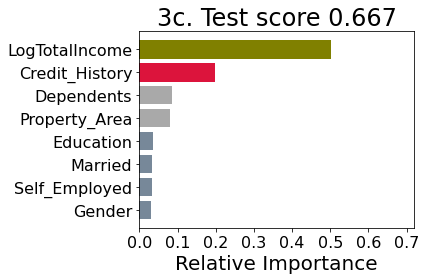

In [135]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 8
colors[7] = 'olive'
colors[6] = 'crimson'
colors[5] = 'darkgray'
colors[4] = 'darkgray'
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.title('3c. Test score 0.667', fontsize=BIGGER_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_3c.png')
plt.show()

## 4a: , random_state = 57, n_estimators = 200, take out Loan_Amount_Term and LoanAmount columns, also remove columns with lower importance in previous runs ( 'Gender', 'Education', 'Self_Employed', 'Married') - Combined incomes

In [136]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', 'Gender', 'Education', 'Self_Employed', 'Married', "ApplicantIncome", "CoapplicantIncome", "LogTotalIncome", "LogLoanAmount" ], axis=1)
feature_names = data.columns

In [137]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [138]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  0.995260663507109
Training score with oob sampling:  0.6682464454976303
Test score:  0.6808510638297872


In [139]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.6609806351813509, 'TotalIncome'),
 (0.20580783709102188, 'Credit_History'),
 (0.07215266785324637, 'Dependents'),
 (0.061058859874380915, 'Property_Area')]

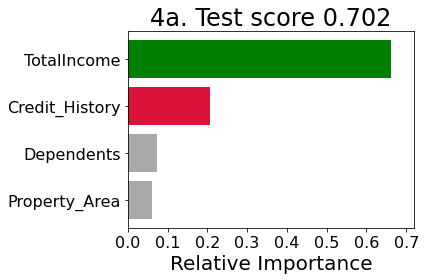

In [140]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 4
colors[3] = 'green'
colors[2] = 'crimson'
colors[1] = 'darkgray'
colors[0] = 'darkgray'
plt.title('4a. Test score 0.702', fontsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_4a.png')
plt.show()



## 4b: , random_state = 57, n_estimators = 200, take out Loan_Amount_Term and LoanAmount columns, also remove columns with lower importance in previous runs ( 'Gender', 'Education', 'Self_Employed', 'Married') - Applicant and co-applicant income separate

In [141]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', 'Gender', 'Education', 'Self_Employed', 'Married', "TotalIncome", "LogTotalIncome", "LogLoanAmount"], axis=1)
feature_names = data.columns

In [142]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [143]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  0.995260663507109
Training score with oob sampling:  0.6943127962085308
Test score:  0.7163120567375887


In [144]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.4567012424308162, 'ApplicantIncome'),
 (0.2213329167251324, 'CoapplicantIncome'),
 (0.19817534509204868, 'Credit_History'),
 (0.0669279904174372, 'Dependents'),
 (0.05686250533456549, 'Property_Area')]

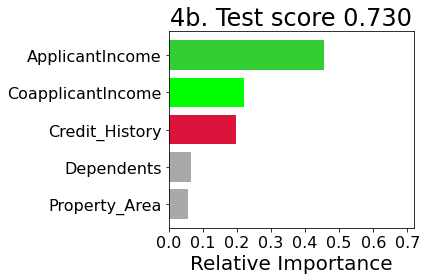

In [145]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 5
colors[4] = 'limegreen'
colors[3] = 'lime'
colors[2] = 'crimson'
colors[1] = 'darkgray'
colors[0] = 'darkgray'
plt.title('4b. Test score 0.730', fontsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_4b.png')
plt.show()


## 4c:  random_state = 57, n_estimators = 200, take out Loan_Amount_Term and LoanAmount columns, also remove columns with lower importance in previous runs ( 'Gender', 'Education', 'Self_Employed', 'Married') - Log(TotalIncome)

In [146]:
target = train_data["Loan_Status"]
target_names = ["Denied", "Approved"]
data = train_data.drop(["Loan_Status",'LoanAmount', 'Loan_Amount_Term', 'Gender', 'Education', 'Self_Employed', 'Married', "TotalIncome",  "ApplicantIncome", "CoapplicantIncome", "LogLoanAmount"], axis=1)
feature_names = data.columns

In [147]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=57)

In [148]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200, oob_score = True)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)
print('Training score: ', rf.score(X_train, y_train))
print('Training score with oob sampling: ', rf.oob_score_)
print('Test score: ', rf.score(X_test, y_test))

Training score:  0.995260663507109
Training score with oob sampling:  0.6635071090047393
Test score:  0.6666666666666666


In [149]:
# Examine feature importances
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.6674095810100268, 'LogTotalIncome'),
 (0.2031981878016899, 'Credit_History'),
 (0.06723195246124407, 'Dependents'),
 (0.062160278727039234, 'Property_Area')]

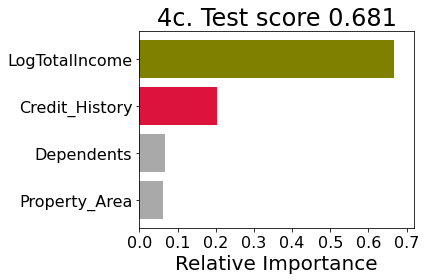

In [150]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)
colors = ['lightslategray',] * 4
colors[3] = 'olive'
colors[2] = 'crimson'
colors[1] = 'darkgray'
colors[0] = 'darkgray'
plt.title('4c. Test score 0.681', fontsize=BIGGER_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.barh(range(len(indices)), importances[indices], color=colors, align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=MEDIUM_SIZE)
plt.xlim(0, 0.72)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
plt.tight_layout()
plt.savefig('../static/images/RF_4c.png')
plt.show()
